In [1]:
pip install pandas_ods_reader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_ods_reader import read_ods

In [3]:
base_path = "C:/Users/Natalia/Documents/labs/2.1.3.ods"
sheet_index = 1
df = read_ods(base_path , sheet_index)

In [4]:
df

,n,L(f1=2.3515кГц)_O2,L(f2=1.9865кГц)_O2,L(f3=3.4817кГц)_O2,L(f4=1.7826кГц)_O2,"L(f1=2,0175кГц)_CO2","L(f2=2,2312кГц)_CO2","L(f3=2,4164кГц)_CO2","L(f4=2,6113кГц)_CO2","L(f5=0,7614кГц)_CO2","L(f6=1,4211кГц)_CO2",T1,T2,T3,T4
0,1.0,700.0,700.0,700.0,700.0,710.0,700.0,700.0,700.0,700.0,701.0,200.0,204.0,200.0,205.0
1,2.0,741.0,790.0,751.0,798.0,777.0,765.0,761.0,750.0,900.0,807.0,447.0,447.0,457.0,461.0
2,3.0,776.0,876.0,802.0,895.0,847.0,830.0,819.0,809.0,NaN,916.0,663.0,663.0,676.0,689.0
3,4.0,813.0,NaN,852.0,NaN,923.0,896.0,877.0,862.0,NaN,NaN,875.0,869.0,895.0,907.0
4,5.0,850.0,NaN,902.0,NaN,NaN,NaN,919.0,NaN,NaN,NaN,1088.0,1098.0,1340.0,1355.0
5,6.0,888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
d_array = df.to_numpy()

In [18]:
d_array_L_f1_O2 = d_array[0:6, 1]
d_array_L_f2_O2 = d_array[0:3, 2]
d_array_L_f3_O2 = d_array[0:5, 3]
d_array_L_f4_O2 = d_array[0:3, 4]
d_array_L_f1_CO2 = d_array[0:4, 5]
d_array_L_f2_CO2 = d_array[0:4, 6]
d_array_L_f3_CO2 = d_array[0:5, 7]
d_array_L_f4_CO2 = d_array[0:4, 8]
d_array_L_f5_CO2 = d_array[0:2, 9]
d_array_L_f6_CO2 = d_array[0:3, 10]
d_array_T1 = d_array[0:5, 11]
d_array_T2 = d_array[0:5, 12]
d_array_T3 = d_array[0:5, 13]
d_array_T4 = d_array[0:5, 14]
d_array_n2 = d_array[0:2, 0]
d_array_n3 = d_array[0:3, 0]
d_array_n4 = d_array[0:4, 0]
d_array_n5 = d_array[0:5, 0]
d_array_n6 = d_array[0:6, 0]

In [20]:
d_array_L_f5_CO2

array([700., 900.])

In [21]:
from scipy import optimize
def test_func(x, a, b):
    return a*x + b
p0=[0,0]
params_f1_O2, params_covariance_f1_O2 = optimize.curve_fit(test_func, d_array_n6, d_array_L_f1_O2,
                                               p0)
params_f2_O2, params_covariance_f2_O2 = optimize.curve_fit(test_func, d_array_n3, d_array_L_f2_O2,
                                               p0)
params_f3_O2, params_covariance_f3_O2 = optimize.curve_fit(test_func, d_array_n5, d_array_L_f3_O2,
                                               p0)
params_f4_O2, params_covariance_f4_O2 = optimize.curve_fit(test_func, d_array_n3, d_array_L_f4_O2,
                                               p0)

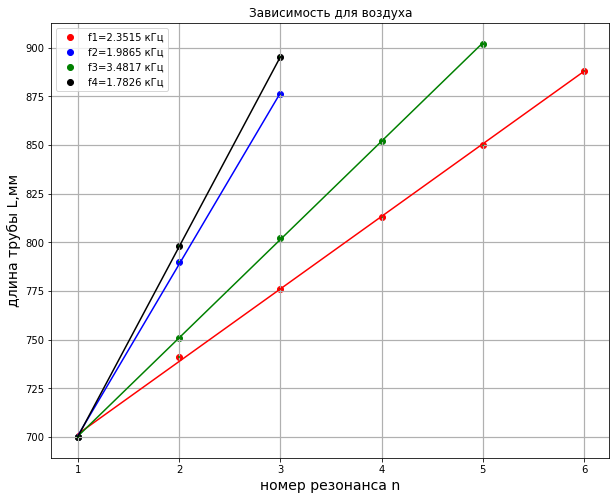

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Зависимость для воздуха", fontsize=12)
ax.set_xlabel("номер резонанса n", fontsize=14)
ax.set_ylabel("длина трубы L,мм", fontsize=14)
ax.grid(which="major", linewidth=1.2)
#ax.set_ylim(0.01, 0.3)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax.scatter(d_array_n6,d_array_L_f1_O2, c="red",label = "f1=2.3515 кГц" )
ax.scatter(d_array_n3,d_array_L_f2_O2, c="blue",label = "f2=1.9865 кГц" )
ax.scatter(d_array_n5,d_array_L_f3_O2, c="green",label = "f3=3.4817 кГц" )
ax.scatter(d_array_n3,d_array_L_f4_O2, c="black",label = "f4=1.7826 кГц" )



ax.plot(d_array_n6, test_func(d_array_n6, params_f1_O2[0], params_f1_O2[1]),c="red")
ax.plot(d_array_n3, test_func(d_array_n3, params_f2_O2[0], params_f2_O2[1]),c="blue")
ax.plot(d_array_n5, test_func(d_array_n5, params_f3_O2[0], params_f3_O2[1]),c="green")
ax.plot(d_array_n3, test_func(d_array_n3, params_f4_O2[0], params_f4_O2[1]),c="black")

ax.errorbar(d_array_n6,d_array_L_f1_O2, xerr=0., yerr=0.5, c="green",fmt='none' )
ax.errorbar(d_array_n3,d_array_L_f2_O2, xerr=0.01, yerr=0.5, c="green",fmt='none' )
ax.errorbar(d_array_n5,d_array_L_f3_O2, xerr=0.01, yerr=0.5, c="green",fmt='none' )
ax.errorbar(d_array_n3,d_array_L_f4_O2, xerr=0.01, yerr=0.5, c="green",fmt='none' )


#ax.errorbar(d_array_T, d_array_Sig, xerr=0, yerr=0.03, c="green")
#plt.fill_between(d_array_T, -0.00012166*d_array_T+0.03, -0.00012166*d_array_T+0.03, alpha=0.3)
ax.legend()
#ax.tick_params(which='major', length=10, width=2)
#ax.tick_params(which='minor', length=5, width=1)
plt.show()

In [31]:
covariance_errors_O2 = [params_covariance_f1_O2[0][0],params_covariance_f2_O2[0][0],params_covariance_f3_O2[0][0],params_covariance_f4_O2[0][0]]
covariance_errors_O2 = np.array(covariance_errors_O2)

In [32]:
covariance_errors_O2

array([0.10965987, 1.33333343, 0.02333333, 0.08333333])

In [27]:
params_f1_CO2, params_covariance_f1_CO2 = optimize.curve_fit(test_func, d_array_n4, d_array_L_f1_CO2,
                                               p0)
params_f2_CO2, params_covariance_f2_CO2 = optimize.curve_fit(test_func, d_array_n4, d_array_L_f2_CO2,
                                               p0)
params_f3_CO2, params_covariance_f3_CO2 = optimize.curve_fit(test_func, d_array_n5, d_array_L_f3_CO2,
                                               p0)
params_f4_CO2, params_covariance_f4_CO2 = optimize.curve_fit(test_func, d_array_n4, d_array_L_f4_CO2,
                                               p0)
params_f5_CO2, params_covariance_f5_CO2 = optimize.curve_fit(test_func, d_array_n2, d_array_L_f5_CO2,
                                               p0)
params_f6_CO2, params_covariance_f6_CO2 = optimize.curve_fit(test_func, d_array_n3, d_array_L_f6_CO2,
                                               p0)

C:\Users\Natalia\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


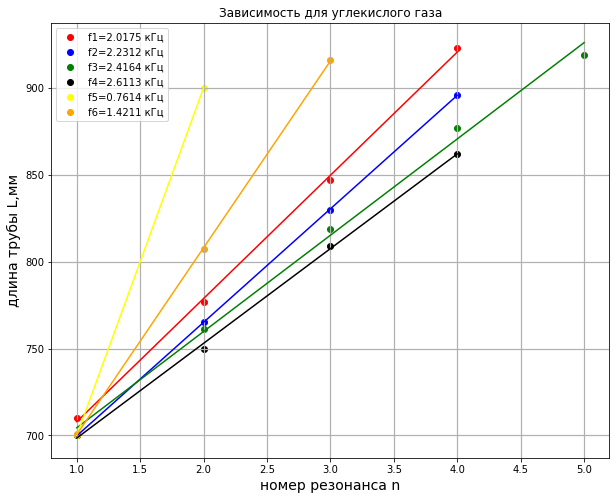

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Зависимость для углекислого газа", fontsize=12)
ax.set_xlabel("номер резонанса n", fontsize=14)
ax.set_ylabel("длина трубы L,мм", fontsize=14)
ax.grid(which="major", linewidth=1.2)
#ax.set_ylim(0.01, 0.3)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax.scatter(d_array_n4,d_array_L_f1_CO2, c="red",label = "f1=2.0175 кГц" )
ax.scatter(d_array_n4,d_array_L_f2_CO2, c="blue",label = "f2=2.2312 кГц" )
ax.scatter(d_array_n5,d_array_L_f3_CO2, c="green",label = "f3=2.4164 кГц" )
ax.scatter(d_array_n4,d_array_L_f4_CO2, c="black",label = "f4=2.6113 кГц" )
ax.scatter(d_array_n2,d_array_L_f5_CO2, c="yellow",label = "f5=0.7614 кГц" )
ax.scatter(d_array_n3,d_array_L_f6_CO2, c="orange",label = "f6=1.4211 кГц" )




ax.plot(d_array_n4, test_func(d_array_n4, params_f1_CO2[0], params_f1_CO2[1]),c="red")
ax.plot(d_array_n4, test_func(d_array_n4, params_f2_CO2[0], params_f2_CO2[1]),c="blue")
ax.plot(d_array_n5, test_func(d_array_n5, params_f3_CO2[0], params_f3_CO2[1]),c="green")
ax.plot(d_array_n4, test_func(d_array_n4, params_f4_CO2[0], params_f4_CO2[1]),c="black")
ax.plot(d_array_n2, test_func(d_array_n2, params_f5_CO2[0], params_f5_CO2[1]),c="yellow")
ax.plot(d_array_n3, test_func(d_array_n3, params_f6_CO2[0], params_f6_CO2[1]),c="orange")


#ax.errorbar(d_array_T, d_array_Sig, xerr=0, yerr=0.03, c="green")
#plt.fill_between(d_array_T, -0.00012166*d_array_T+0.03, -0.00012166*d_array_T+0.03, alpha=0.3)
ax.legend()
#ax.tick_params(which='major', length=10, width=2)
#ax.tick_params(which='minor', length=5, width=1)
plt.show()

In [33]:
covariance_errors_CO2 = [params_covariance_f1_CO2[0][0],params_covariance_f2_CO2[0][0],params_covariance_f3_CO2[0][0],params_covariance_f4_CO2[0][0],params_covariance_f5_CO2[0][0],params_covariance_f6_CO2[0][0]]
covariance_errors_CO2 = np.array(covariance_errors_CO2)

In [34]:
covariance_errors_CO2

array([2.06999996, 0.03      , 4.17333317, 1.35000015,        inf,
       0.75      ])

In [35]:
params_T1, params_covariance_T1 = optimize.curve_fit(test_func, d_array_n5, d_array_T1,
                                               p0)
params_T2, params_covariance_T2 = optimize.curve_fit(test_func, d_array_n5, d_array_T2,
                                               p0)
params_T3, params_covariance_T3 = optimize.curve_fit(test_func, d_array_n5, d_array_T3,
                                               p0)
params_T4, params_covariance_T4 = optimize.curve_fit(test_func, d_array_n5, d_array_T4,
                                               p0)

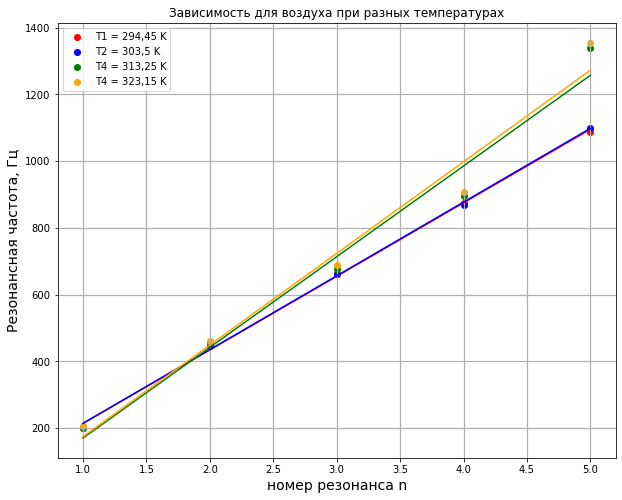

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Зависимость для воздуха при разных температурах", fontsize=12)
ax.set_xlabel("номер резонанса n", fontsize=14)
ax.set_ylabel("Резонансная частота, Гц", fontsize=14)
ax.grid(which="major", linewidth=1.2)
#ax.set_ylim(0.01, 0.3)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax.scatter(d_array_n5,d_array_T1, c="red",label = "T1 = 294,45 K" )
ax.scatter(d_array_n5,d_array_T2, c="blue",label = "T2 = 303,5 K" )
ax.scatter(d_array_n5,d_array_T3, c="green",label = "T4 = 313,25 K" )
ax.scatter(d_array_n5,d_array_T4, c="orange",label = "T4 = 323,15 K" )



ax.plot(d_array_n5, test_func(d_array_n5, params_T1[0], params_T1[1]),c="red")
ax.plot(d_array_n5, test_func(d_array_n5, params_T2[0], params_T2[1]),c="blue")
ax.plot(d_array_n5, test_func(d_array_n5, params_T3[0], params_T3[1]),c="green")
ax.plot(d_array_n5, test_func(d_array_n5, params_T4[0], params_T4[1]),c="orange")



ax.legend()

plt.show()